In [1]:
import pandas as pd
import geopandas as gpd
import folium
import branca
import os

## to assess time script takes to run
import time
start_time = time.time()

In [2]:
hwd = os.getcwd()
print(hwd)

C:\Users\linds\Documents\soa_prez_thegist\choropleth


In [3]:
print(pd.__version__)
print(gpd.__version__)
print(folium.__version__)
print(branca.__version__)

1.1.1
0.8.1
0.11.0
0.4.1


In [4]:
os.chdir("..")

In [5]:
## Load ER visits per K by FIPS county
ER_rate_county = pd.read_csv("data\\NJ_ER_County_2008.csv")

ER_rate_county[['county','fipscounty','ER_VISITS','ER_K','BENE_COUNT','BENE_SMI_CVRAGE_TOT_MONS']].head()

county  fipscounty  ER_VISITS   ER_K  BENE_COUNT  \
0    ATLANTIC       34001         26  266.0         101   
1      BERGEN       34003         70  230.0         311   
2  BURLINGTON       34005         31  201.0         159   
3      CAMDEN       34007         31  188.0         171   
4    CAPE MAY       34009          8  229.0          35   

   BENE_SMI_CVRAGE_TOT_MONS  
0                      1172  
1                      3649  
2                      1850  
3                      1983  
4                       420

In [6]:
# Load Census county shape file
counties = gpd.read_file("gis_data\\tl_2008_34_county\\tl_2008_34_county.shp")
counties[['STATEFP','COUNTYFP', 'NAME', 'geometry']].head()

STATEFP COUNTYFP        NAME  \
0      34      029       Ocean   
1      34      001    Atlantic   
2      34      019   Hunterdon   
3      34      025    Monmouth   
4      34      011  Cumberland   

                                            geometry  
0  POLYGON ((-74.05678 40.09822, -74.05677 40.098...  
1  POLYGON ((-74.76451 39.29662, -74.76466 39.296...  
2  POLYGON ((-75.07043 40.45570, -75.07061 40.456...  
3  POLYGON ((-74.30826 40.35958, -74.30668 40.360...  
4  POLYGON ((-74.85625 39.39076, -74.85614 39.390...

In [7]:
## Load data for hospital/ER markers
hospitals = pd.read_csv("data\\nj_hospitals.csv", low_memory = False)

In [8]:
## concatenate state and county code to join to metric table
counties['fipscountyint'] = counties['STATEFP'].astype(str) + counties['COUNTYFP'].astype(str)
counties['fipscountyint'] = counties['fipscountyint'].astype(int)

counties[['fipscountyint','STATEFP','COUNTYFP', 'NAME', 'geometry']].head()

fipscountyint STATEFP COUNTYFP        NAME  \
0          34029      34      029       Ocean   
1          34001      34      001    Atlantic   
2          34019      34      019   Hunterdon   
3          34025      34      025    Monmouth   
4          34011      34      011  Cumberland   

                                            geometry  
0  POLYGON ((-74.05678 40.09822, -74.05677 40.098...  
1  POLYGON ((-74.76451 39.29662, -74.76466 39.296...  
2  POLYGON ((-75.07043 40.45570, -75.07061 40.456...  
3  POLYGON ((-74.30826 40.35958, -74.30668 40.360...  
4  POLYGON ((-74.85625 39.39076, -74.85614 39.390...

In [9]:
print(ER_rate_county['fipscounty'].dtypes)
print(counties['fipscountyint'].dtypes)

int64
int32


In [10]:
### merge the variables of interest into the Geodataframe
counties = counties.merge(ER_rate_county, left_on='fipscountyint', right_on='fipscounty', how='left')

counties[['NAME','fipscountyint','geometry','ER_K']].sort_values(by=['fipscountyint']).head(22)

## all counties joined to a ER_K metric

NAME  fipscountyint  \
1     Atlantic          34001   
17      Bergen          34003   
7   Burlington          34005   
18      Camden          34007   
5     Cape May          34009   
4   Cumberland          34011   
10       Essex          34013   
11  Gloucester          34015   
19      Hudson          34017   
2    Hunterdon          34019   
16      Mercer          34021   
14   Middlesex          34023   
3     Monmouth          34025   
13      Morris          34027   
0        Ocean          34029   
20     Passaic          34031   
15       Salem          34033   
8     Somerset          34035   
9       Sussex          34037   
12       Union          34039   
6       Warren          34041   

                                             geometry   ER_K  
1   POLYGON ((-74.76451 39.29662, -74.76466 39.296...  266.0  
17  POLYGON ((-74.06249 40.80496, -74.06513 40.803...  230.0  
7   POLYGON ((-74.73772 40.13746, -74.73748 40.137...  201.0  
18  POLYGON ((-75.12225 39.87385, -75.12255 39.873...  188.0  
5   POLYGON ((-74.76555 39.29754, -74.76549 39.297...  229.0  
4   POLYGON ((-74.85625 39.39076, -74.85614 39.390...  185.0  
10  POLYGON ((-74.32280 40.90883, -74.32247 40.908...  188.0  
11  POLYGON ((-75.12307 39.87404, -75.12255 39.873...  251.0  
19  POLYGON ((-74.12092 40.74155, -74.12104 40.741...  198.0  
2   POLYGON ((-75.07043 40.45570, -75.07061 40.456...   75.0  
16  POLYGON ((-74.92361 40.32702, -74.92461 40.327...  269.0  
14  POLYGON ((-74.30826 40.35958, -74.31292 40.355...  211.0  
3   POLYGON ((-74.30826 40.35958, -74.30668 40.360...  201.0  
13  POLYGON ((-74.32280 40.90883, -74.32288 40.908...  163.0  
0   POLYGON ((-74.05678 40.09822, -74.05677 40.098...  191.0  
20  POLYGON ((-74.15892 40.83592, -74.15912 40.836...  136.0  
15  POLYGON ((-75.37847 39.74674, -75.37842 39.746...  125.0  
8   POLYGON ((-74.59567 40.38594, -74.59584 40.385...  154.0  
9   POLYGON ((-74.97219 41.09548, -74.97337 41.094...  326.0  
12  POLYGON ((-74.14596 40.67822, -74.14548 40.677...  165.0  
6   POLYGON ((-75.10871 40.94356, -75.10968 40.945...  189.0

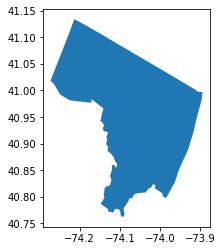

In [11]:
## the geometry column has the coordinates to create the counties
## use matplotlib plot to show lat/long on x/y axis
import matplotlib.pyplot as plt

counties_sub = counties[counties['NAME'] == 'Bergen']
counties_sub.plot()
plt.show()

In [12]:
# name of the county must be in lowercase for Folium to work
counties.rename(columns={ counties.columns[4]: 'name' }, inplace = True)
counties.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 21 entries, 0 to 20
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   STATEFP                   21 non-null     object  
 1   COUNTYFP                  21 non-null     object  
 2   COUNTYNS                  21 non-null     object  
 3   CNTYIDFP                  21 non-null     object  
 4   name                      21 non-null     object  
 5   NAMELSAD                  21 non-null     object  
 6   LSAD                      21 non-null     object  
 7   CLASSFP                   21 non-null     object  
 8   MTFCC                     21 non-null     object  
 9   CSAFP                     18 non-null     object  
 10  CBSAFP                    21 non-null     object  
 11  METDIVFP                  16 non-null     object  
 12  FUNCSTAT                  21 non-null     object  
 13  geometry                  21 non-null     ge

In [13]:
variable = 'ER_K' #metric of interest
name = 'ER Visits per K'

print(name, "colorscale")
print("Min:",counties[variable].min())
print("Max:",counties[variable].max())
    
colorscale = branca.colormap.linear.YlOrRd_09.scale(counties[variable].min(), counties[variable].max()) 
colorscale

ER Visits per K colorscale
Min: 75.0
Max: 326.0


In [14]:
## identifies the center point of all the counties
centroid=counties.geometry.centroid 

## initiaes a map based on the centroid
m=folium.Map(location=[centroid.y.mean(), centroid.x.mean()], zoom_start=8) 
    
m

<ipython-input-14-1b16660315c8>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid=counties.geometry.centroid


In [15]:
## add colorscale to map so that it appears as the legend
colorscale.add_to(m)

choropleth_counties = folium.GeoJson(counties, ## GeoPandas dataframe
name='Counties',
                   
## style function controls fill of counties
style_function = lambda x: {'weight':1
                        , 'color': '#545453'
                        ## apply colorscale based on variable
                        , 'fillColor':colorscale(x['properties']['ER_K'])
                        ## set opacity of color fill
                        , 'fillOpacity': 0.5},
                   
## changes styling of geo regions upon hover
highlight_function = lambda x: {'weight':3, 'color':'black', 'fillOpacity': 1}, 
               
## tooltip can include information from any column in the GeoPandas dataframe   
tooltip = folium.features.GeoJsonTooltip(
fields = ['name','ER_K'],
aliases = ['County:','ER Visits per K'])
)

m.add_child(choropleth_counties)

m

In [16]:
feature_group = folium.FeatureGroup(name='Emergency Rooms')

for i in range(0,len(hospitals)):
    folium.Marker([hospitals.iloc[i]['latitude'], hospitals.iloc[i]['longitude']], popup=hospitals.iloc[i]['map_name'], name = 'ER').add_to(feature_group)
    
m.add_child(feature_group)

# add the layer control
folium.LayerControl().add_to(m)

m.save("choropleth\\nj_choropleth.html")

In [17]:
print((time.time() - start_time)/60, "minutes")

0.13851281801859539 minutes
